# Sujet 5: Analyse des dialogues dans l'Avare de Molière

J'ai choisi de partir du format markdown.

In [1]:
import os
import urllib.request    
data_url = "http://dramacode.github.io/markdown/moliere_avare.txt"
data_file = "moliere_avare.txt"
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file) 

Je voudrais faire un dataframe contenant pour chaque scène les interventions de chaque personnage. 

In [2]:
import pandas as pd

Je récupère le nom des personnages: 

In [3]:
text=open(data_file,'r')
Lines = text.readlines()


In [4]:
Perso = []
for l in Lines:
    if l[0:4]=='    ':
        name=l[4:].split('.')[0].split('*')[0].split(',')[0]
        if name not in Perso and name[-1]!=' ':
            Perso.append(name)
Perso    

['VALÈRE',
 'ÉLISE',
 'CLÉANTE',
 'HARPAGON',
 'LA FLÈCHE',
 'MAÎTRE SIMON',
 'FROSINE',
 'MAÎTRE JACQUES',
 'LA MERLUCHE',
 'BRINDAVOINE',
 'MARIANE',
 'LE COMMISSAIRE',
 'ANSELME']

Je récupère les actes et les scènes:

In [6]:
Scene=''
Scenes=[]
for l in Lines:
    if l[0:2]=='##':
        if l[2]!='#':
            Acte=l.split(' ')[2].split('.')[0]
        else : 
            Scene=Acte+'_'+l.split(' ')[2].split('.')[0]
            Scenes.append(Scene)
    #elif Scene!='':
        #print(l)
        
Scenes

['Premier_Première',
 'Premier_II',
 'Premier_III',
 'Premier_IV',
 'Premier_V',
 'II_Première',
 'II_II',
 'II_III',
 'II_IV',
 'II_V',
 'III_Première',
 'III_II',
 'III_III',
 'III_IV',
 'III_V',
 'III_VI',
 'III_VII',
 'III_VIII',
 'III_IX',
 'IV_Première',
 'IV_II',
 'IV_III',
 'IV_IV',
 'IV_V',
 'IV_VI',
 'IV_VII',
 'V_Première',
 'V_II',
 'V_III',
 'V_IV',
 'V_V',
 'V_VI']

Après avoir vérifié que je récupère bien tous les personnages et toutes les scènes, je construis un dataframe qui contient les répliques de chaque personnage dans chaque scènes. 

In [7]:
df=pd.DataFrame(index=Perso, columns=Scenes)

In [8]:
df=pd.DataFrame()
Scene=''
for l in Lines:
    if l[0:2]=='##':
        if l[2]!='#':
            Acte=l.split(' ')[2].split('.')[0]
        else : 
            Scene=Acte+'_'+l.split(' ')[2].split('.')[0]
            new_row = pd.Series(data={}, name=Scene)
            #append row to the dataframe
            df = df.append(new_row, ignore_index=False)
            Name=''
    elif l[0:4]=='    ':
        Name=l[4:].split('.')[0].split('*')[0].split(',')[0]
        if Name[-1]==' ': 
            Name=Name[:-1]
        if Name not in df.columns: 
            df[Name]=None
        if isinstance(df[Name][Scene],list)==False: df[Name][Scene]=[]                    
    
    elif Scene!='' and Name!='' and l[0] != '\n': 
        df[Name][Scene].append(l.split('\n')[0])
            
            
df['VALÈRE']['Premier_Première']


["Hé quoi, charmante Élise, vous devenez mélancolique, après les obligeantes assurances que vous avez eu la bonté de me donner de votre foi ?Je vous vois soupirer, hélas, au milieu de ma joie !Est-ce du regret, dites-moi, de m'avoir fait heureux ? et vous repentez-vous de cet engagement où mes feux ont pu vous contraindre ?",
 'Hé que pouvez-vous craindre, Élise, dans les bontés que vous avez pour moi ?',
 'Ah ! ne me faites pas ce tort, de juger de moi par les autres.Soupçonnez-moi de tout, Élise, plutôt que de manquer à ce que je vous dois.Je vous aime trop pour cela\xa0; et mon amour pour vous, durera autant que ma vie.',
 "Puisque les seules actions font connaître ce que nous sommes\xa0; attendez donc au moins à juger de mon cœur par elles, et ne me cherchez point des crimes dans les injustes craintes d'une fâcheuse prévoyance. Ne m'assassinez point, je vous prie, par les sensibles coups d'un soupçon outrageux\xa0; et donnez-moi le temps de vous convaincre, par mille et mille preuv

In [9]:
print(len(df['VALÈRE']['Premier_Première']))

8


Il y a 8 répliques de Valère dans Acte I scène 1. 

In [10]:
len(df['VALÈRE']['Premier_Première'][0].split(' '))

56

Il y a 56 mots dans la première réplique (en coupant simplement aux espaces). 

## Question 1
Classez les personnages selon la quantité de parole grâce à une analyse syntaxique du texte (scènes / répliques / mots). En particulier, quel est celui qui parle le plus ? Quel est celui qui ne parle pas du tout ? Attention, les noms des personnages ne sont pas forcément homogènes (casse et accents par exemple).

Quel est le personnage qui parle le plus à chaque scène? En nombre de répliques, puis en nombre de mots.

In [11]:
df

VALÈRE  \
Premier_Première  [Hé quoi, charmante Élise, vous devenez mélanc...   
Premier_II                                                      NaN   
Premier_III                                                     NaN   
Premier_IV                                                      NaN   
Premier_V         [C'est vous, Monsieur, sans contredit., Non. M...   
II_Première                                                     NaN   
II_II                                                           NaN   
II_III                                                          NaN   
II_IV                                                           NaN   
II_V                                                            NaN   
III_Première      [Je n'ai jamais vu de réponse plus impertinent...   
III_II            [À ce que je puis voir, Maître Jacques, on pay...   
III_III                                                         NaN   
III_IV                                                          NaN   
III_V                                                           NaN   
III_VI                                                          NaN   
III_VII                                       [Il a perdu le sens.]   
III_VIII                                                        NaN   
III_IX                           [Cela ne sera rien., C'est assez.]   
IV_Première                                                     NaN   
IV_II                                                           NaN   
IV_III                                                          NaN   
IV_IV                                                           NaN   
IV_V                                                            NaN   
IV_VI                                                           NaN   
IV_VII                                                          NaN   
V_Première                                                      NaN   
V_II                                                            NaN   
V_III             [Que voulez-vous, Monsieur ?, De quel crime vo...   
V_IV              [Ce ne sera point votre passion qui jugera l'a...   
V_V               [Qui songe à votre argent, dont vous me faites...   
V_VI                                                            NaN   

                                                              ÉLISE  \
Premier_Première  [Non, Valère, je ne puis pas me repentir de to...   
Premier_II        [Me voilà prête à vous ouïr, mon Frère. Qu'ave...   
Premier_III                                                     NaN   
Premier_IV        [Nous ne venons que d'arriver., Quoi ?, Pardon...   
Premier_V         [Vous moquez-vous, Valère, de lui parler comme...   
II_Première                                                     NaN   
II_II                                                           NaN   
II_III                                                          NaN   
II_IV                                                           NaN   
II_V                                                            NaN   
III_Première                                       [Oui, mon Père.]   
III_II                                                          NaN   
III_III                                                         NaN   
III_IV                                                          NaN   
III_V                                                           NaN   
III_VI            [Vous avez fait, Madame, ce que je devais fair...   
III_VII                                                         NaN   
III_VIII                                                        NaN   
III_IX                                                          NaN   
IV_Première       [Oui, Madame, mon Frère m'a fait confidence de...   
IV_II                                             [Voilà mon Père.]   
IV_III                                                          NaN   
IV_IV                                                           NaN   
IV_V         

Je génère un dataframe `NW` qui contient le nombre de mots de chaque personnage dans chaque scène.

In [13]:
def NWords(Name, Scene):
    N=0
    if isinstance(df[Name][Scene],list):
        for i in range(0,len(df[Name][Scene])):
            N+=len(df[Name][Scene][i].split(' '))
    return N
    
NWords('VALÈRE','Premier_Première')    


593

In [14]:
Perso = df.columns
NW=pd.DataFrame(index=df.index)
for Name in Perso:
    NW[Name]=[NWords(Name,Scene) for Scene in df.index]
NW

VALÈRE  ÉLISE  CLÉANTE  HARPAGON  LA FLÈCHE  MAÎTRE SIMON  \
Premier_Première     593    463        0         0          0             0   
Premier_II             0    150      725         0          0             0   
Premier_III            0      0        0       459        249             0   
Premier_IV             0    158      211      1094          0             0   
Premier_V            666     36        0       268          0             0   
II_Première            0      0      350         0        852             0   
II_II                  0      0      126       159         13           186   
II_III                 0      0        0        21          0             0   
II_IV                  0      0        0         0        281             0   
II_V                   0      0        0       520          0             0   
III_Première         245      3       74       729          0             0   
III_II               107      0        0         0          0             0   
III_III                0      0        0         0          0             0   
III_IV                 0      0        0         0          0             0   
III_V                  0      0        0       100          0             0   
III_VI                 0     16        0        66          0             0   
III_VII                5      0      565       172          0             0   
III_VIII               0      0        0        20          0             0   
III_IX                 6      0       38        75          0             0   
IV_Première            0     54      229         0          0             0   
IV_II                  0      3       12        49          0             0   
IV_III                 0      0      383       364          0             0   
IV_IV                  0      0      158       148          0             0   
IV_V                   0      0      157       120          0             0   
IV_VI                  0      0       15         0         40             0   
IV_VII                 0      0        0       392          0             0   
V_Première             0      0        0        84          0             0   
V_II                   0      0        0       168          0             0   
V_III                600      0        0       429          0             0   
V_IV                  19    139        0       120          0             0   
V_V                  358      0        0       240          0             0   
V_VI                   0      0      125        87          0             0   

                  FROSINE  MAÎTRE JACQUES  LA MERLUCHE  BRINDAVOINE  MARIANE  \
Premier_Première        0               0            0            0        0   
Premier_II              0               0            0            0        0   
Premier_III             0               0            0            0        0   
Premier_IV              0               0            0            0        0   
Premier_V               0               0            0            0        0   
II_Première             0               0            0            0        0   
II_II                   0               0            0            0        0   
II_III                  1               0            0            0        0   
II_IV                 116               0            0            0        0   
II_V                 1448               0            0            0        0   
III_Première            0             734           22           20        0   
III_II                  0             184            0            0        0   
III_III                18              11            0            0        0   
III_IV                182               0            0            0      173   
III_V                  21               0            0            0        0   
III_VI                  7               0            0            0       32   
III_VII                40               0         

Je génère un dataframe `NS` qui contient le nombre de répliques de chaque personnage dans chaque scène.

In [15]:
def Nsentences(Name, Scene):
    N=0
    if isinstance(df[Name][Scene],list):
        N=len(df[Name][Scene])
    return N

In [16]:
NS=pd.DataFrame(index=df.index)
for Name in Perso:
    NS[Name]=[Nsentences(Name,Scene) for Scene in df.index]
NS

VALÈRE  ÉLISE  CLÉANTE  HARPAGON  LA FLÈCHE  MAÎTRE SIMON  \
Premier_Première       8      8        0         0          0             0   
Premier_II             0      9       10         0          0             0   
Premier_III            0      0        0        42         33             0   
Premier_IV             0     24       29        56          0             0   
Premier_V             24      4        0        22          0             0   
II_Première            0      0       21         0         20             0   
II_II                  0      0        6         9          1             5   
II_III                 0      0        0         1          0             0   
II_IV                  0      0        0         0          6             0   
II_V                   0      0        0        35          0             0   
III_Première          11      1        3        40          0             0   
III_II                14      0        0         0          0             0   
III_III                0      0        0         0          0             0   
III_IV                 0      0        0         0          0             0   
III_V                  0      0        0         2          0             0   
III_VI                 0      1        0         6          0             0   
III_VII                1      0       23        17          0             0   
III_VIII               0      0        0         2          0             0   
III_IX                 2      0        2         6          0             0   
IV_Première            0      2       10         0          0             0   
IV_II                  0      1        1         3          0             0   
IV_III                 0      0       22        23          0             0   
IV_IV                  0      0        8         9          0             0   
IV_V                   0      0       19        18          0             0   
IV_VI                  0      0        5         0          6             0   
IV_VII                 0      0        0         5          0             0   
V_Première             0      0        0         6          0             0   
V_II                   0      0        0        19          0             0   
V_III                 30      0        0        30          0             0   
V_IV                   1      2        0         4          0             0   
V_V                   15      0        0        11          0             0   
V_VI                   0      0        4        10          0             0   

                  FROSINE  MAÎTRE JACQUES  LA MERLUCHE  BRINDAVOINE  MARIANE  \
Premier_Première        0               0            0            0        0   
Premier_II              0               0            0            0        0   
Premier_III             0               0            0            0        0   
Premier_IV              0               0            0            0        0   
Premier_V               0               0            0            0        0   
II_Première             0               0            0            0        0   
II_II                   0               0            0            0        0   
II_III                  1               0            0            0        0   
II_IV                   5               0            0            0        0   
II_V                   44               0            0            0        0   
III_Première            0              30            2            1        0   
III_II                  0              12            0            0        0   
III_III                 2               1            0            0        0   
III_IV                  5               0            0            0        6   
III_V                   1               0            0            0        0   
III_VI                  2               0            0            0        5   
III_VII                 2               0         

Text(0.5,1,'Nombre de répliques par personnage et par scène')

<Figure size 432x288 with 0 Axes>

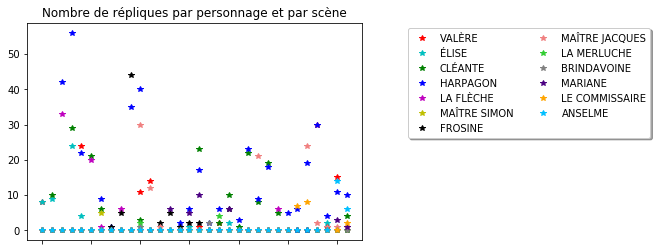

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
colors=['r','c','g','b','m','y','k','lightcoral','limegreen','grey','indigo','orange','deepskyblue']
NS.plot(style='*', color=colors)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=2)
plt.title('Nombre de répliques par personnage et par scène')

Text(0.5,1,'Nombre de mots par personnage et par scène')

<Figure size 432x288 with 0 Axes>

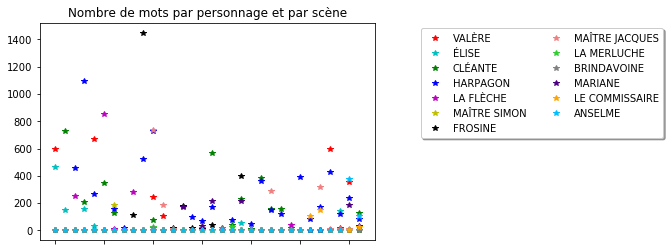

In [50]:
fig = plt.figure()
colors=['r','c','g','b','m','y','k','lightcoral','limegreen','grey','indigo','orange','deepskyblue']
NW.plot(style='*', color=colors)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1.0), shadow=True, ncol=2)
plt.title('Nombre de mots par personnage et par scène')

Je calcule le nombre total de répliques et de mots prononcés par chaque personnage. 

In [55]:
NW.sum(axis=0)

VALÈRE            2599
ÉLISE             1022
CLÉANTE           3168
HARPAGON          5884
LA FLÈCHE         1435
MAÎTRE SIMON       186
FROSINE           2232
MAÎTRE JACQUES    1587
LA MERLUCHE         50
BRINDAVOINE         38
MARIANE            857
LE COMMISSAIRE     277
ANSELME            483
dtype: int64

Du plus silencieux au plus bavard:

In [61]:
NW.sum(axis=0).sort_values()

BRINDAVOINE         38
LA MERLUCHE         50
MAÎTRE SIMON       186
LE COMMISSAIRE     277
ANSELME            483
MARIANE            857
ÉLISE             1022
LA FLÈCHE         1435
MAÎTRE JACQUES    1587
FROSINE           2232
VALÈRE            2599
CLÉANTE           3168
HARPAGON          5884
dtype: int64

C'est Harpagon qui prononce le plus de mots, et Brindavoine qui en prononce le moins. Je fais pareil avec les répliques:

In [62]:
NS.sum(axis=0).sort_values()

BRINDAVOINE         3
MAÎTRE SIMON        5
LA MERLUCHE         6
LE COMMISSAIRE     17
ANSELME            20
MARIANE            31
ÉLISE              52
LA FLÈCHE          66
FROSINE            69
MAÎTRE JACQUES     93
VALÈRE            106
CLÉANTE           163
HARPAGON          376
dtype: int64

De façon rassurante, en ne comptant que les répliques, on tombe sur un ordre très similaire. J'ai vérifié manuellement que Brindavoine n'a bien que 3 répliques, et Maître Simon 5, c'est bon. 

## Question 2
Réalisez un graphique qui montrera le nombre de mots que chaque acteur prononce dans chaque scène. Pour cela, vous pouvez vous inspirer de l'étude de l'Avare de Molière réalisée par l'OBVIL (graphe de gauche). Dans ce graphique, les lignes sont de longueur égale et la hauteur représente le nombre de mots prononcés au total dans la scène. La largeur de chaque rectangle indique le pourcentage de la scène qu’un acteur occupe.